In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# olist_customers_dataset = pd.read_csv("data/customers_dataset.csv", sep = ",")
# # olist_geolocation_dataset = pd.read_csv("data/geolocation_dataset.csv", sep = ",")
# olist_order_items = pd.read_csv("data/order_items_dataset.csv", sep = ",")
# olist_order_payments_dataset = pd.read_csv("data/order_payments_dataset.csv", sep = ",")
# olist_order_review_dataset = pd.read_csv("data/order_reviews_dataset.csv", sep = ",")
# olist_orders_dataset = pd.read_csv("data/orders_dataset.csv", sep = ",")
# olist_products = pd.read_csv("data/products_dataset.csv", sep = ",")
# olist_sellers_dataset = pd.read_csv("data/sellers_dataset.csv", sep = ",")
# olist_product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv", sep = ",")
# olist_state_name = pd.read_csv("data/state_name_dataset.csv", sep = ",")

In [3]:
olist_customers_dataset = pd.read_csv("data2/olist_customers_dataset.csv", sep = ",")
olist_geolocation_dataset = pd.read_csv("data2/olist_geolocation_dataset.csv", sep = ",")
olist_order_items = pd.read_csv("data2/olist_order_items_dataset.csv", sep = ",")
olist_order_payments_dataset = pd.read_csv("data2/olist_order_payments_dataset.csv", sep = ",")
olist_order_review_dataset = pd.read_csv("data2/olist_order_reviews_dataset.csv", sep = ",")
olist_orders_dataset = pd.read_csv("data2/olist_orders_dataset.csv", sep = ",")
olist_products = pd.read_csv("data2/olist_products_dataset.csv", sep = ",")
olist_sellers_dataset = pd.read_csv("data2/olist_sellers_dataset.csv", sep = ",")
olist_product_category_name_translation = pd.read_csv("data2/product_category_name_translation.csv", sep = ",")
# olist_state_name = pd.read_csv("data/state_name_dataset.csv", sep = ",")

56.79
171.8375


Text(0.5, 1.0, 'Histogramme des Payment')

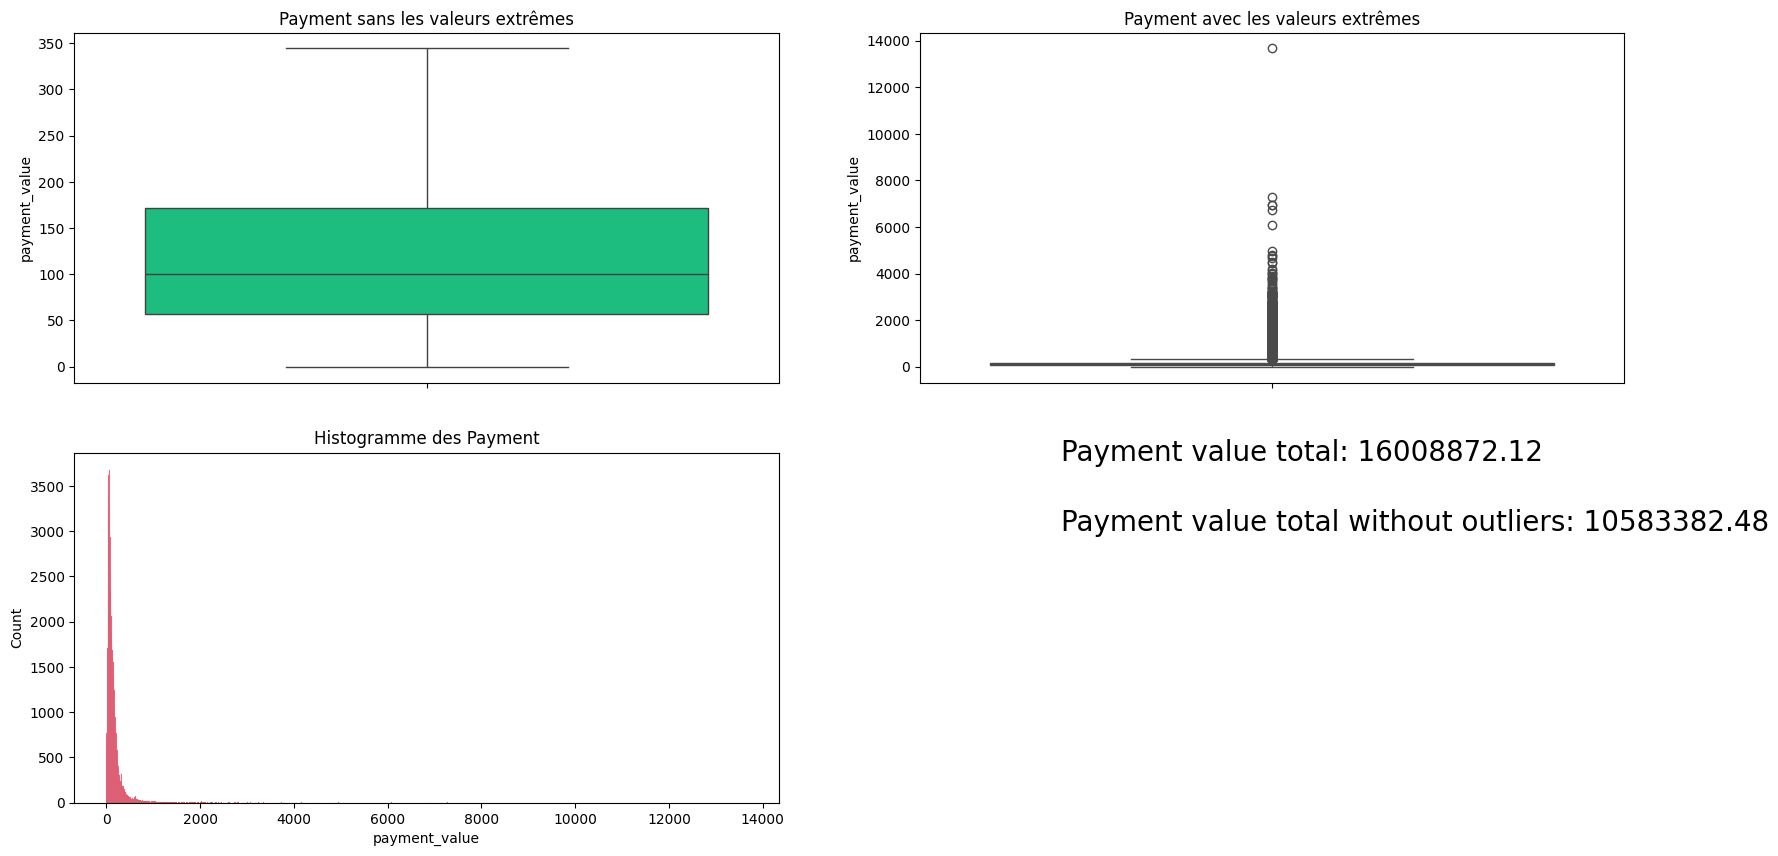

In [14]:
colors = [(1/256,217/256,132/256), (249/256,185/256,0/256), (241/256,62/256,92/256),\
          (31/256,69/256,232/256)] #Vert, Jaune, Rouge, Bleu

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, squeeze=False, figsize=(20, 10))
sns.boxplot(data=olist_order_payments_dataset['payment_value'], showfliers=False, ax=ax1, color = colors[0])
sns.boxplot(data=olist_order_payments_dataset['payment_value'], showfliers=True, ax=ax2, color = colors[1])
sns.histplot(data=olist_order_payments_dataset['payment_value'], ax=ax3, color = colors[2])
somme_payment = 'Payment value total: ' + str(olist_order_payments_dataset['payment_value'].sum())
ax4.text(0.2, 1.0, somme_payment, fontsize=20, ha='left', va='center')

# # Conversion de la colonne en type numérique
# olist_order_payments_dataset['payment_value'] = pd.to_numeric(olist_order_payments_dataset['payment_value'], errors='coerce')

# Supprimer les outliers basés sur les quantiles
lower_bound = olist_order_payments_dataset['payment_value'].quantile(0.25)
print(lower_bound)

upper_bound = olist_order_payments_dataset['payment_value'].quantile(0.75)
print(upper_bound)

# upper_bound = df['col_name'].quantile(0.75)
df_filtered = olist_order_payments_dataset['payment_value'][(olist_order_payments_dataset['payment_value'] >= lower_bound) & (olist_order_payments_dataset['payment_value'] <= upper_bound)]
# print(df_filtered)



somme_payment_wooutlier = 'Payment value total without outliers: ' + str(olist_order_payments_dataset['payment_value'].sum() - df_filtered.sum())
ax4.text(0.2, 0.8, somme_payment_wooutlier, fontsize=20, ha='left', va='center')
ax4.axis('off')
ax1.set_title('Payment sans les valeurs extrêmes')
ax2.set_title('Payment avec les valeurs extrêmes')
ax3.set_title('Histogramme des Payment')

In [15]:
mask_q1 = pd.to_datetime(olist_orders_dataset["order_delivered_customer_date"]).dt.month.isin([1,2,3])
mask_q2 = pd.to_datetime(olist_orders_dataset["order_delivered_customer_date"]).dt.month.isin([4,5,6])
mask_q3 = pd.to_datetime(olist_orders_dataset["order_delivered_customer_date"]).dt.month.isin([7,8,9])
mask_q4 = pd.to_datetime(olist_orders_dataset["order_delivered_customer_date"]).dt.month.isin([10,11,12])

<Axes: xlabel='Trimestre', ylabel='Ventes'>

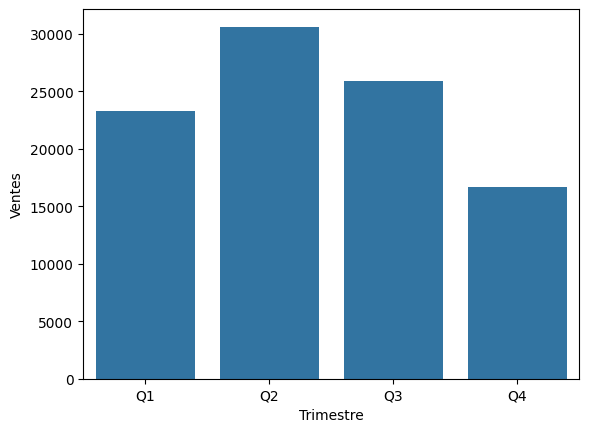

In [16]:
data = [
    ['Q1', len(olist_customers_dataset[mask_q1])],
    ['Q2', len(olist_customers_dataset[mask_q2])],
    ['Q3', len(olist_customers_dataset[mask_q3])],
    ['Q4', len(olist_customers_dataset[mask_q4])],
]


df = pd.DataFrame(data, columns=['Trimestre', 'Ventes'])

df

sns.barplot(x='Trimestre', y='Ventes', data =df)

In [17]:
# # Utiliser groupby pour agréger les montants par type de paiement
# df_aggregated = df.groupby('Type de paiement')['Montant'].sum().reset_index()

# # Créer le graphique camembert à partir du DataFrame agrégé
# plt.figure(figsize=(8, 8))
# plt.pie(df_aggregated['Montant'], labels=df_aggregated['Type de paiement'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
# plt.title('Répartition des paiements')
# plt.axis('equal')  # Assurez-vous que le camembert est un cercle
# plt.show()
# En utilisant groupby pour agréger les montants par type de paiement, le DataFrame df_aggregated contiendra uniquement les montants agrégés, ce qui devrait accélérer la création du graphique camembert. Vous pouvez adapter cette approche en fonction de la structure réelle de votre DataFrame.








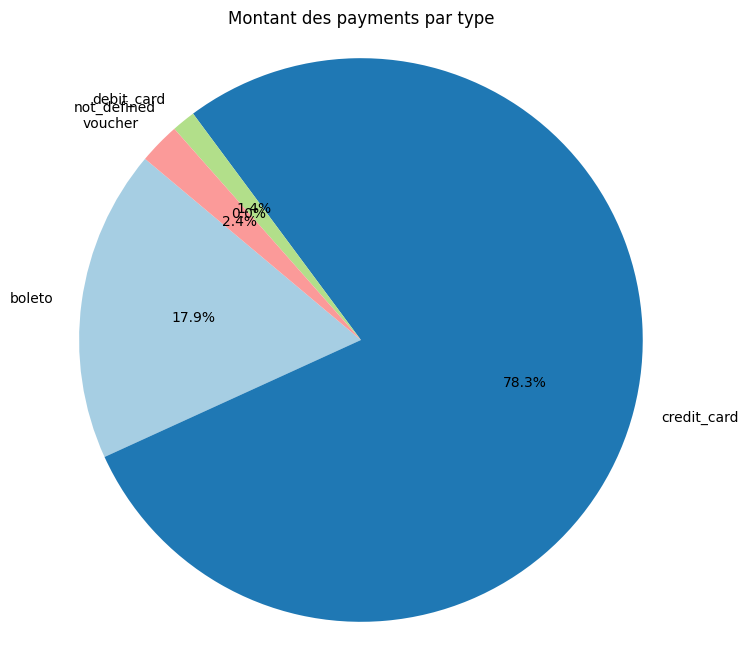

In [23]:
df_payment_type_analysis = pd.DataFrame(olist_order_payments_dataset[['payment_type', 'payment_value']])
df_payment_type_analysis.head(5)
df_payment_type_analysis_aggregated = df_payment_type_analysis.groupby('payment_type')['payment_value'].sum().reset_index()
df_payment_type_analysis_aggregated


plt.figure(figsize=(8, 8))
plt.pie(df_payment_type_analysis_aggregated['payment_value'], labels=df_payment_type_analysis_aggregated['payment_type'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Montant des payments par type')
plt.show()

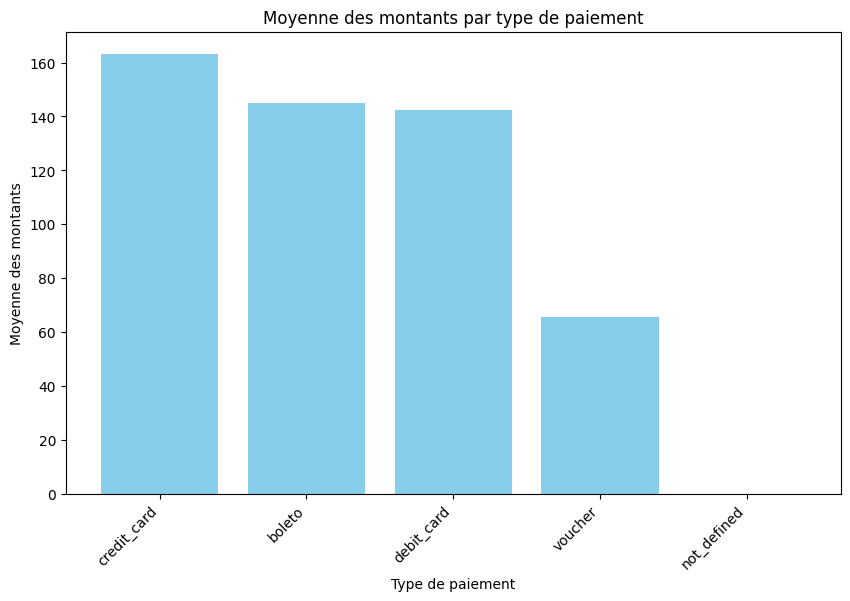

In [34]:
df_payment_type_analysis.head(5)

df_payment_type_analysis_mean = df_payment_type_analysis.groupby('payment_type')['payment_value'].mean().reset_index().sort_values(by='payment_value', ascending=False)
df_payment_type_analysis_mean


plt.figure(figsize=(10, 6))
plt.bar(df_payment_type_analysis_mean['payment_type'], df_payment_type_analysis_mean['payment_value'], color='skyblue')
plt.xlabel('Type de paiement')
plt.ylabel('Moyenne des montants')
plt.title('Moyenne des montants par type de paiement')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()


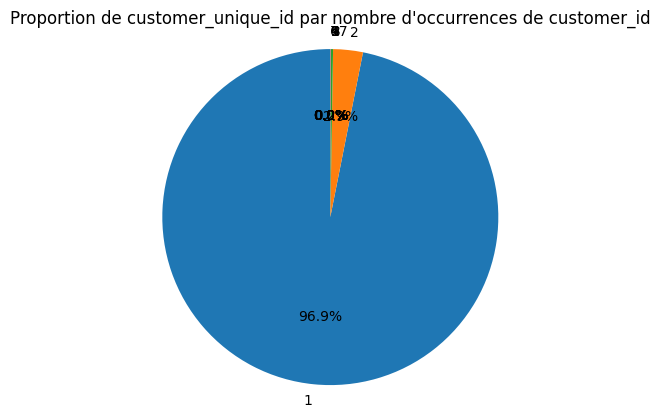

In [85]:
# data = [[1, 4], [2, 5], [3, 6]]
# index = ['A', 'B', 'C']
# df = pd.DataFrame(data,
# columns=['col1', 'col2'])

df1 = olist_customers_dataset
# df2 = df1[['customer_id', 'customer_unique_id',]].groupby('customer_unique_id').size().reset_index(name='count').query('count >= 2')
# df2

# Groupement par 'customer_unique_id' et calcul du nombre d'occurrences dans chaque groupe
grouped_counts = df1.groupby('customer_unique_id').size()

# Comptage du nombre de customer_unique_id pour chaque occurrence
occurrence_counts = grouped_counts.value_counts().sort_index()
occurrence_counts

plt.pie(occurrence_counts, labels=occurrence_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion de customer_unique_id par nombre d\'occurrences de customer_id')
plt.axis('equal')
plt.show()


In [ ]:
# Je veux analyser les notes des clients sur chaque commande.

# dans un premier temps, je veux créer un dataframe propre pour comprendre la répartition des commandes par statut. Cette information est contenue dans le champ order_status du dataframe olist_orders_dataset, dont la clé primaire est order_id.

Répartition des commandes par statut :
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
   review_score  count
0             5  57328
1             4  19142
3             3   8179
4             2   3151
2             1  11424


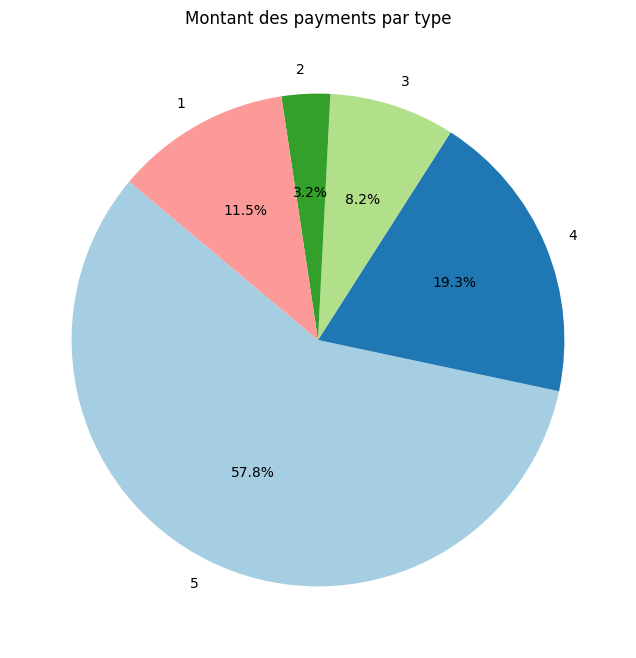

In [75]:
orders_df = olist_orders_dataset[["order_id", "order_status"]].copy()
order_status_counts = orders_df["order_status"].value_counts()

print("Répartition des commandes par statut :")
print(order_status_counts)

delivered_orders_df = orders_df[orders_df["order_status"] == "delivered"]
merged_df_lf = pd.merge(olist_order_review_dataset, delivered_orders_df, on="order_id", how="left")


merged_df_lf.head(10)

merged_df_lf_df = merged_df_lf[["order_id", "review_score"]]
merged_df_lf_df_ratings = merged_df_lf_df["review_score"].value_counts().reset_index().sort_values(by="review_score", ascending=False)
print(merged_df_lf_df_ratings)

plt.figure(figsize=(8, 8))
plt.pie(merged_df_lf_df_ratings['count'], labels=merged_df_lf_df_ratings['review_score'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Montant des payments par type')
plt.show()

In [64]:
# analyser dans le dataframe reviews le nombre de review_id par order_id
review_count_per_order = olist_order_review_dataset[['review_id', 'order_id']].groupby("order_id")["review_id"].count()
# df.groupby('order_id')['review_id'].count()

print(review_count_per_order)

# Utilisation de la méthode value_counts() pour compter le nombre de reviews par order_id
order_review_counts = review_count_per_order.value_counts()

# Affichage du résultat
print(order_review_counts)


order_id
00010242fe8c5a6d1ba2dd792cb16214    1
00018f77f2f0320c557190d7a144bdd3    1
000229ec398224ef6ca0657da4fc703e    1
00024acbcdf0a6daa1e931b038114c75    1
00042b26cf59d7ce69dfabb4e55b4fd9    1
                                   ..
fffc94f6ce00a00581880bf54a75a037    1
fffcd46ef2263f404302a634eb57f7eb    1
fffce4705a9662cd70adb13d4a31832d    1
fffe18544ffabc95dfada21779c9644f    1
fffe41c64501cc87c801fd61db3f6244    1
Name: review_id, Length: 98673, dtype: int64
review_id
1    98126
2      543
3        4
Name: count, dtype: int64
